# Imports

In [41]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics as mt
import matplotlib.pyplot as plt
import numpy as np

# Load dataset

In [2]:
df = pd.read_csv('../datasets/train.csv')

# Data preparation

In [3]:
df.columns

Index(['id_cliente', 'idade', 'saldo_atual', 'divida_atual', 'renda_anual',
       'valor_em_investimentos', 'taxa_utilizacao_credito', 'num_emprestimos',
       'num_contas_bancarias', 'num_cartoes_credito', 'dias_atraso_dt_venc',
       'num_pgtos_atrasados', 'num_consultas_credito', 'taxa_juros',
       'investe_exterior', 'pessoa_polit_exp', 'limite_adicional'],
      dtype='object')

In [4]:
features = ['idade', 'divida_atual', 'renda_anual', 'valor_em_investimentos', 'taxa_utilizacao_credito', 
            'num_emprestimos', 'num_contas_bancarias', 'num_cartoes_credito', 'dias_atraso_dt_venc',
            'num_pgtos_atrasados', 'num_consultas_credito', 'taxa_juros']
label = 'saldo_atual'

In [5]:
x_train = df.loc[:, features]
y_train = df.loc[:, label]

# Model Training

In [6]:
# model definition
# model fit (ajuste/treinamento)
# model prediction (previsão)

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [7]:
print(lr.coef_)
print(lr.intercept_)

[ 3.96706202e-04 -4.00595601e-02  2.77622532e-06 -1.04318668e-03
  9.80890872e+00 -1.22353405e-02 -6.33015538e-03 -3.57808095e-03
 -2.15858165e+00  3.77570060e-04  6.79176336e-03  3.48471845e-03]
190.8235914412423


#Considerando as 12 features o modelo de linear regression gerará uma função conforme abaixo 
- y = a1*x + a2*x + ... + a12*x + b 
- onde ai são os coef_s e b é o intercept_

In [8]:
y_pred = lr.predict(x_train)

In [9]:
df_result = df.loc[:, ['id_cliente', 'saldo_atual']]

In [10]:
df_result['saldo_previsto'] = y_pred

In [11]:
df_result

,id_cliente,saldo_atual,saldo_previsto
0,1767,278.172008,346.669549
1,11920,268.874152,367.840277
2,8910,446.643127,431.468979
3,4964,321.141267,445.506463
4,10100,428.716114,378.271169
...,...,...,...
9495,5155,157.500279,449.221632
9496,11977,497.714090,369.259284
9497,9278,306.557684,412.251748
9498,2525,209.870718,400.685299


In [12]:
y_manual_pred = x_train.apply(lambda x: sum( x * lr.coef_) + lr.intercept_, axis=1)
y_manual_pred

0       346.669549
1       367.840277
2       431.468979
3       445.506463
4       378.271169
           ...    
9495    449.221632
9496    369.259284
9497    412.251748
9498    400.685299
9499    455.264823
Length: 9500, dtype: float64

# Performance

In [13]:
mt.r2_score(y_train, y_pred)

0.16917364489050013

In [14]:
mt.mean_squared_error(y_train, y_pred)

39370.26503401535

In [15]:
mt.mean_squared_error(y_train, y_pred) ** 0.5

198.4194169783173

# Exercicios

**1 - Refaça o código de treinamento da aula 19: “Linear Regression - Prática” no
seu computador usando o Jupyter Notebook ou o Google Colabs e compute o R2,
o MSE e o RMSE**
Feito acima

**2. Qual o problema principal de usar a métrica MSE? Escreve um exemplo
hipotético, no qual o problema acontece.**
Existem na verdade dois problemas principais em utilizar a métrica MSE:
- Ele não possui a mesma unidade de medida dos dados uma vez que é elevado ao quadrado
- Também por ser elevado ao quadrado ele acaba por não apresentar robustez na presença de utliers

**3. Explique com um pequeno texto ilustrando o benefício de usar a métrica
RMSE.**
Exitem duas principais vantagens em se utilizar a métrica RMSE:
- Ela utiliza a mesma unidade de medida dos dados. Ou seja se estou medindo metros o RMSE será em metros. Logo é mais fácil avaliar a métrica
- Ela possui um pouco mais de robustez quanto a outliers. Porém ainda sofre de interferecia do mesmo. Dependendo do nível de robustez que se requer da métrica isto pode ser tanto uma vantagem quanto uma desvantagem 

**4. Modifique 5% das linhas de algumas colunas, adicionando outliers e refaça
as métricas de R2, MSE e RMSE.**
Utilizando a feature taxa_utilizacao_credito e alterando outliers para 5%
- inicial        r2: 0.067197; mse: 4.420262e+04; rmse: 210.244180
- variando em x: r2: 0.000014; mse: 4.738623e+04; rmse: 217.683785
- variando em y: r2: 0.002599; mse: 1.684029e+06; rmse: 1297.701407

In [278]:
df.corr().loc[['saldo_atual'], :]

/tmp/ipykernel_5008/242624477.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().loc[['saldo_atual'], :]


,id_cliente,idade,saldo_atual,divida_atual,renda_anual,valor_em_investimentos,taxa_utilizacao_credito,num_emprestimos,num_contas_bancarias,num_cartoes_credito,dias_atraso_dt_venc,num_pgtos_atrasados,num_consultas_credito,taxa_juros
saldo_atual,-0.009932,0.000953,1.0,-0.315957,0.022475,-0.007659,0.259224,-0.008864,-0.007229,-0.002577,-0.284146,-0.000655,0.002544,0.005784


**5 Refaça o exercícios 4 com as seguintes quantidade de outliers: 2%, 5%,
10%, 20% e 30%.**
- 1. Como as métricas R2, MSE e RMSE se comportam com a variação outliers no conjunto de dados? 
- 2. Observando as respostas anteriores, quais são as ações que aumentam ou diminuem as métricas de “R2”, “MSE” ou “RMSE” de um problema de negócio?

### Resposta 5.1
Considerando a coluna taxa_utilizacao_credito quue possui uma correlação de -0,31 e R2 de 0,09 com a saldo_atual 

1 - O R2 tende a cair bruscamente quando aumenta-se a porcentagem de outliers até 5%. A partir de então os valores e R2 seguem uma plato proximo a 0. Independente de onde se localizam estes aumentos (variavel explicativa ou resposta) as quedas observadas no R2 são as mesmas.

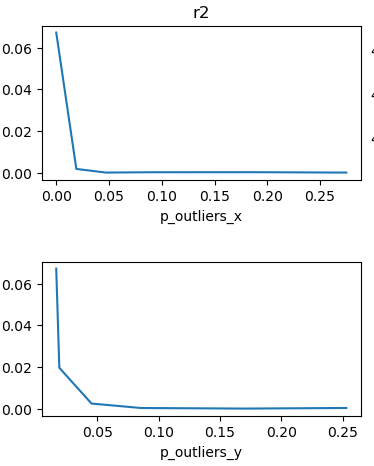

2 - Para  mse e rmse o comportamento observado difere um pouco do anterior.
Quando se é aumentado a quantidade de outliers na variável explicativa (eixo x). O score mse e rmse sofrem abruptos aumentos até a porcentagem de 5% de outliers. Este é muito semelhante ao comportamento observado no R2, porem em ordem inversa.
Já quando é aumentado a quantidade de outliers na variável resposta (eixo y). O score mse e rmse sofrem graduais aumentos que ao que tudo indica parecem continuar mesmo depois de 30% de outliers.
Isso me leva a entender que outliers no x são piores que outliers no y

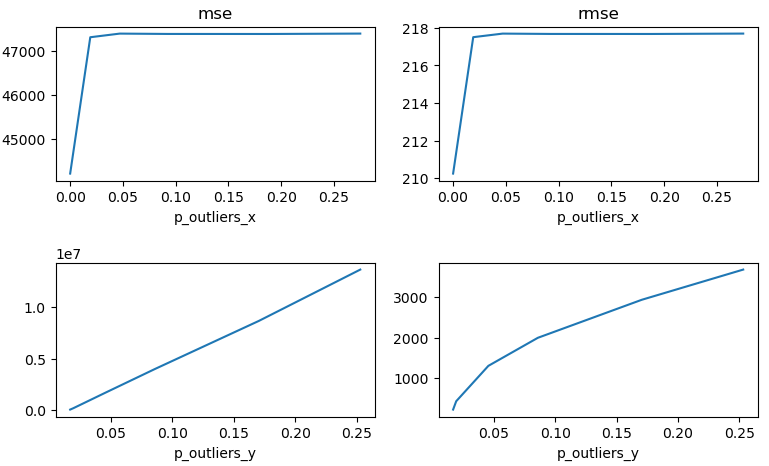

3 - Por fim, vale observar que, quando a variavel explicativa já não possui forte correlação com a variável resposta, o aumento da porcentagem de outliers acaba por não impactar os indices pois os mesmos já são ruins. Logo a variação dos mesmos tende a ser mais aleatória.
Abaixo segue os graficos considerando a coluna renda_anual que possui uma correlação de 0.02 e R2 de 0,0004 com a saldo_atual

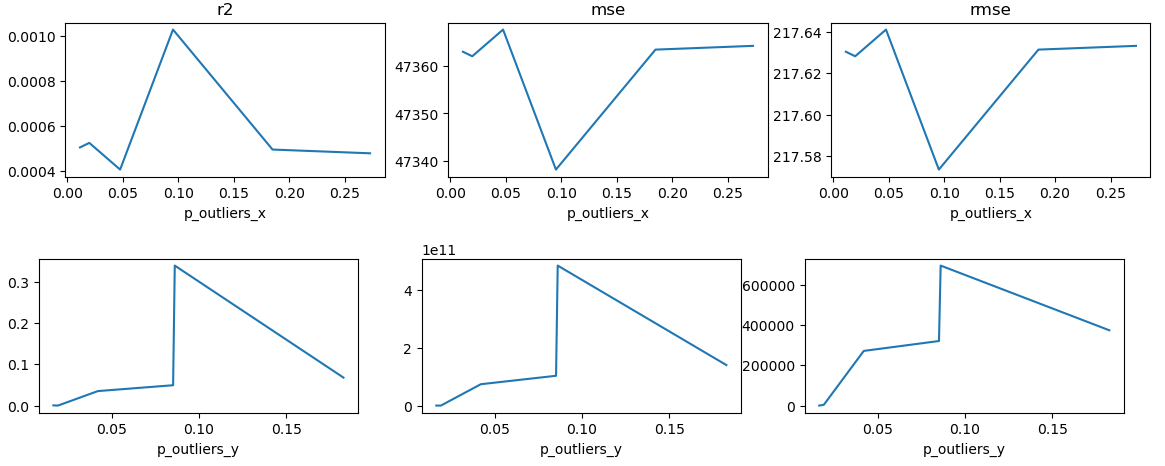

In [307]:
def indetify_outliers(serie, ef = 1.5):
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    LI = Q1 - ef * IQR
    LS = Q3 + ef * IQR
    outliers = (serie < LI) | (serie > LS)
    return outliers

def analiyze_data(x, y, outlier_limit):
    outliers_x = indetify_outliers(x, outlier_limit)
    p_outliers_x = sum(outliers_x)/len(outliers_x)    

    outliers_y = indetify_outliers(y, outlier_limit)
    p_outliers_y = sum(outliers_y)/len(outliers_y)

    lr = LinearRegression()
    x_fixed = pd.DataFrame(x) 
    lr.fit(x_fixed, y)
    y_pred = lr.predict(x_fixed)
    r2 = mt.r2_score(y, y_pred)
    mse = mt.mean_squared_error(y, y_pred)
    rmse = np.sqrt(mt.mean_squared_error(y, y_pred))
    dic = {'p_outliers_x': p_outliers_x,
           'p_outliers_y': p_outliers_y,
           'r2': r2,
           'mse': mse,
           'rmse': rmse}
    return dic

def set_perc_outliers(serie, p, outlier_limit):
    n_samples = len(serie)
    outliers = indetify_outliers(serie, outlier_limit)
    n_outliers = sum(outliers)
    n_outliers_add = int(p * n_samples - n_outliers)
    IQR = serie.quantile(0.75) - serie.quantile(0.25)
    random_multiplier = np.random.randint(-20 * outlier_limit, 20 * outlier_limit, size=(n_outliers_add))
    new_outliers_values = x[outliers == False].sample(n_outliers_add) + IQR * random_multiplier
    serie_copy = serie.copy()
    serie_copy.update(new_outliers_values)
    return serie_copy

In [309]:
#divida_atual
#taxa_utilizacao_credito
#renda_anual
#idade
x = x_train['renda_anual'].copy()
y = y_train.copy()

outlier_limit = 3 #number of times that the IQR will be multiplied to define de LS and LI
p_outilers = [0.02, 0.05, 0.1, 0.2, 0.3]
analyze_data = []
dic = analiyze_data(x, y, outlier_limit)
dic['variated'] = 'i'
analyze_data.append(dic)
for p in p_outilers:
    x_variation = set_perc_outliers(x, p, outlier_limit)
    dic = analiyze_data(x_variation, y, outlier_limit)
    dic['variated'] = 'x'
    analyze_data.append(dic)
    y_variation = set_perc_outliers(y, p, outlier_limit)
    dic = analiyze_data(x, y_variation, outlier_limit)
    dic['variated'] = 'y'
    analyze_data.append(dic)

df_analyze = pd.DataFrame(analyze_data)
df_analyze

,p_outliers_x,p_outliers_y,r2,mse,rmse,variated
0,0.011263,0.016632,0.000505,4.736294e+04,217.630279,i
1,0.019684,0.016632,0.000525,4.736199e+04,217.628096,x
2,0.011263,0.019263,0.000006,1.765056e+07,4201.257085,y
3,0.047474,0.016632,0.000407,4.736758e+04,217.640953,x
4,0.011263,0.042105,0.035088,7.388590e+10,271819.613957,y
5,0.095158,0.016632,0.001027,4.733823e+04,217.573510,x
6,0.011263,0.085158,0.049261,1.030707e+11,321046.280679,y
7,0.184947,0.016632,0.000496,4.736338e+04,217.631302,x
8,0.011263,0.182632,0.067754,1.400940e+11,374291.354758,y
9,0.272947,0.016632,0.000479,4.736417e+04,217.633112,x


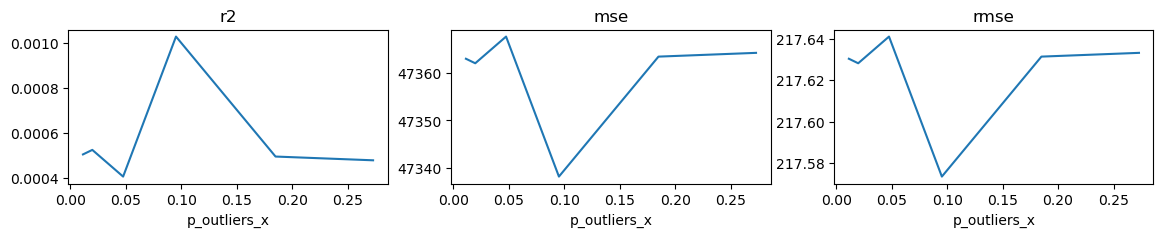

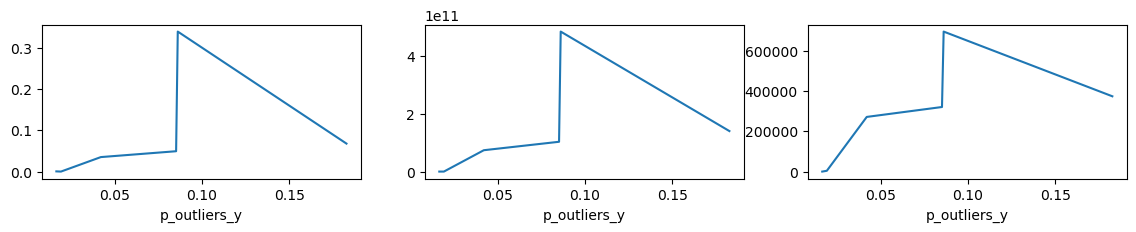

In [310]:
df_plot = df_analyze[df_analyze['variated'] != 'y'].sort_values('p_outliers_x')
plt.figure(figsize=(14,2))
plt.subplot(131)
plt.plot(df_plot['p_outliers_x'], df_plot['r2'])
plt.title('r2')
plt.xlabel('p_outliers_x')
plt.subplot(132)
plt.plot(df_plot['p_outliers_x'], df_plot['mse'])
plt.title('mse')
plt.xlabel('p_outliers_x')
plt.subplot(133)
plt.plot(df_plot['p_outliers_x'], df_plot['rmse'])
plt.title('rmse')
plt.xlabel('p_outliers_x')
df_plot = df_analyze[df_analyze['variated'] != 'x'].sort_values('p_outliers_y')
plt.figure(figsize=(14,2))
plt.subplot(131)
plt.plot(df_plot['p_outliers_y'], df_plot['r2'])
plt.xlabel('p_outliers_y')
plt.subplot(132)
plt.plot(df_plot['p_outliers_y'], df_plot['mse'])
plt.xlabel('p_outliers_y')
plt.subplot(133)
plt.plot(df_plot['p_outliers_y'], df_plot['rmse'])
plt.xlabel('p_outliers_y')
plt.show()

# Testes

In [49]:
import numpy as np
def sum_of_squares(x1, x2):
    np_x1 = np.array(x1)
    np_x2 = np.array(x2)
    return sum((np_x1 - np_x2) ** 2)
    
def coef_determinacao(real, pred):
    np_real = np.array(real)
    np_pred = np.array(pred)
    u = np_real.mean()
    return 1 - (sum_of_squares(np_real, np_pred) / sum_of_squares(np_real, u))

In [58]:
import matplotlib.pyplot as plt

In [189]:
lr2 = LinearRegression()
x = np.array([1,2,3,4,5,6,7,8,9]).reshape(-1,1)
y_true = np.array([1,2,3,4,5,6,7,8,9]) + [1,1,0,-1,2,-2,-1,0,1]
lr2.fit(x, y_true)
y_pred = lr2.predict(x)

In [190]:
coef_determinacao(y_true, y_pred)
r2_score(y_true, y_pred)

0.7981751824817518

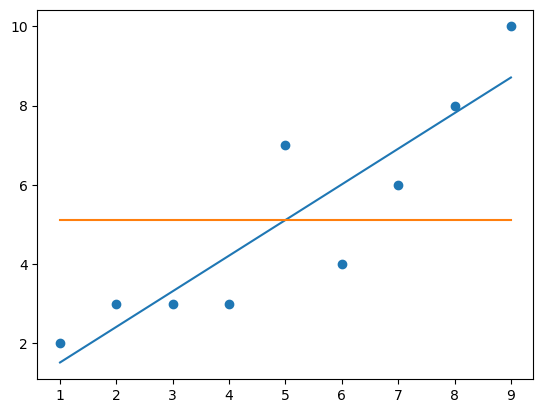

In [191]:
plt.scatter(x, y_true)
plt.plot(x, y_pred)
plt.plot(x, np.full(9, y_pred.mean()))

0.16917364489050013